# Assignment 3: Policy Gradient Methods

__LINK TO VIDEO:__ https://youtu.be/qpOKslvCxBY

## Cartpole-v0 Environment

### Setup
- We are using Cartpole-v0 environment.
- Termination criteria for episode: 
    - Pole Angle is more than ±12°
    - Cart Position is more than ±2.4 (center of the cart reaches the edge of the display)
    - Episode length is greater than 200
- Termination of Policy update:
    - n, update steps completed. (where n is the number of times policy had to be updated.)
    - running average over episodes becomes greater then the reward threshold.

### Algorithms
1. Vanilla Policy Gradient
2. Vanilla Policy Gradient(Normalized)
3. Vanilla Policy Gradient with baseline(Normalized)
4. Actor-Critic Method(Normalized)

###  Policy
1. A neural network with 1 hidden layer of 128 neurons is used for all algorithms.
2. We use, $- log(action_prob)*state\_value$ as our loss function
3. There exists a differentiable path to update all weights. As explained in the last section.

### Comparison 
| Algorithm | Number of iterations | Training data | Note on reward growth |
|---|---|---|---|
| Vanilla Policy Gradient(VPG) | 330-340 | - | The approximation of action probablity isn't stable as we can see by the highly varying graph. |
| Vanilla Policy Gradient(Normalized) | 130-140 | - | More stable than VPG but doesn't have stable growth in rewards.|
| Vanilla Policy Gradient with Baseline(Normalized)| 190-200 | Uses nearly half the data per iteration compared to other algorithms. (as half the data used to form baseline) | The algorithm uses lesser data in comparison to the 2 VPG algorithms to converge. Initially no growth in rewards is seen and in the last 50 iterations there is a sudden growth. Thus, the growth in reward seems a bit unstable. |
| Actor-Critic(Normalize) | 190-200 | - | The algorithm has the most stable growth in rewards among the 4 algorithms |

### References
- Code example followed for policy: https://github.com/pytorch/examples/blob/60108edfa3838a823220e16428cb5f98e8e88d53/reinforcement_learning/reinforce.py#L65
- Blog with explaination: https://medium.com/@ts1829/policy-gradient-reinforcement-learning-in-pytorch-df1383ea0baf

### Differentiable Path
<img src="Cartpole.jpeg">

In [1]:
import gym
from Policy import Policy, learn_policy
from VanillaPolicyGradient_withoutNormalization import VanillaAgent
from VanillaPolicyGradient_withNormalization import VanillaAgent_withNorm
from plotting import plotting, plotting_pendulum

In [2]:
env = gym.make('CartPole-v0')
input_dim = 4
hidden_dim = 128
output_dim = 2

In [3]:
policy = Policy(input_dim, hidden_dim, output_dim)
agent = VanillaAgent(policy)

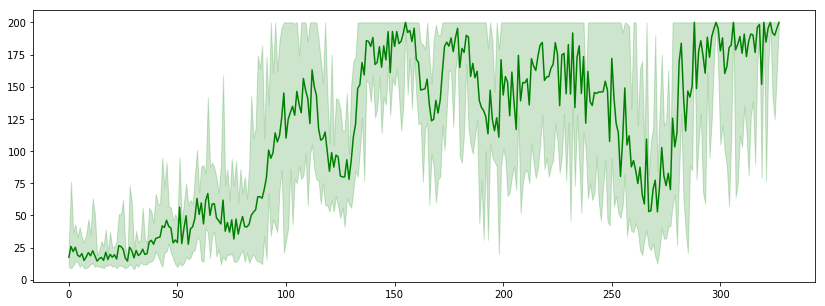

In [4]:
plotting(env, agent, learn_policy, 800)

In [5]:
policy = Policy(input_dim, hidden_dim, output_dim)
agent = VanillaAgent_withNorm(policy)

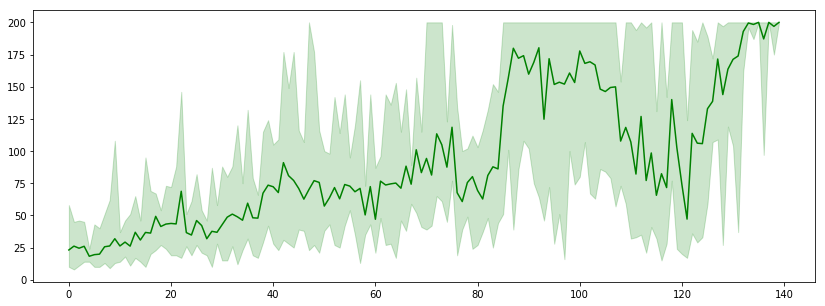

In [6]:
plotting(env, agent, learn_policy, 800)

In [7]:
from Baseline_withNormalization import BaselineAgent
policy = Policy(input_dim, hidden_dim, output_dim)
agent = BaselineAgent(policy)

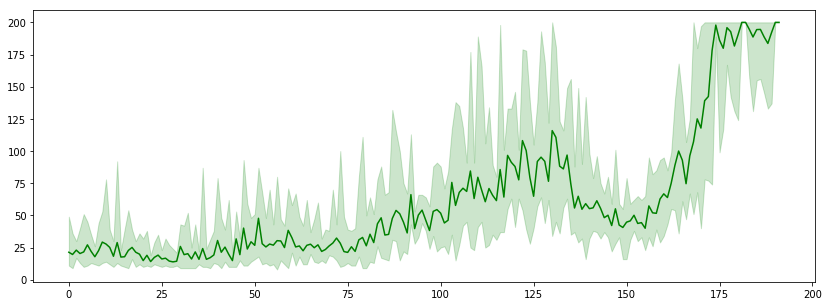

In [8]:
plotting(env, agent, learn_policy, 800)

In [9]:
from ActorCriticAgent import ActorCriticAgent
from ACPolicy import ACPolicy
policy = ACPolicy(input_dim, hidden_dim, output_dim)
agent = ActorCriticAgent(policy)

/home/aishwarya/CourseWork/Sem5/TopicsInML/assignment3/20171046_assign3/ActorCriticAgent.py:40: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  value_loss.append(F.smooth_l1_loss(value, torch.tensor([R])))


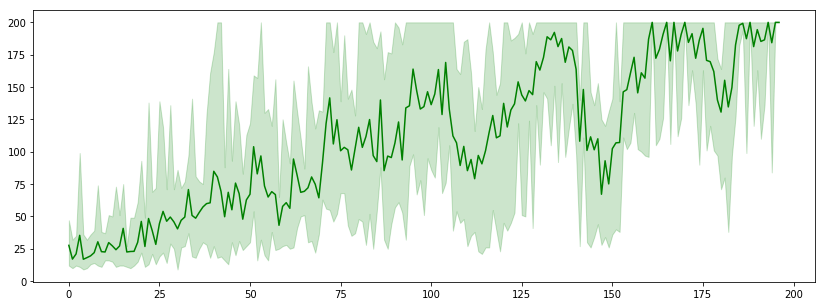

In [10]:
plotting(env, agent, learn_policy, 800)

## Pendulum-v0 Environment

### Setup
- We are using Pendulum-v0 environment.
- Termination criteria for episode: 
    - Episode length is greater than 200
- Termination of Policy update:
    - n, update steps completed. (where n is the number of times policy had to be updated.)

### Algorithms
1. Vanilla Policy Gradient
2. Vanilla Policy Gradient(Normalized)
3. Vanilla Policy Gradient with baseline(Normalized)
4. Actor-Critic Method(Normalized)
4. Gaussian Policy(Normalized)

###  Policy
1. A neural network with 3 hidden layers of 8 neurons each is used for all algorithms.
2. We use, $- sign(action)*(action\_min + action*(action\_max - action\_min))*state\_value$ as our loss function
3. There exists a differentiable path to updat all weights. As explained in the last section.

### Comparison 
| Algorithm | Average Value | Max-Min | Note on reward growth |
|---|---|---|---|
| Vanilla Policy Gradient(VPG) | -1300 | -1000 to -1800 | The performace of all VPG variations is similar. |
| Vanilla Policy Gradient(Normalized) | -1300 | -1000 to -1800 | - |
| Vanilla Policy Gradient with Baseline(Normalized)| -1200 | -900 to -1800 | - |
| Actor-Critic(Normalize) | -1200 | -900 to -1700 | Has lesser variance compared to the VPG variations |
| Gaussian Policy(Normalize) | -1200 | -800 to -1700 | Reaches the highesr maximum reward compared to others overall performance is similar to other algorithms. |

### Note
None of the algorithms are able to converge and reach a solution.
On going through the web a working solution of Pendulum with the algorithms discussed here can't be found. After going through the results here it's clear that these algorithms are not suitable for solving this particular problem. 

Algorithms suitable for this environment include: Distributed Distributional Deterministic Policy Gradient, Deep Deterministic Policy Gradient, Cross Entropy Method
### References
Neural Net Architecture: https://github.com/mveres01/ddpg-pendulum/blob/6c49c8e58a014062d7095617714a5da02edea904/ddpg.py#L24


### Differentiable Path
<img src="Pendulum.jpeg">

In [2]:
import gym
from Pendulum_Policy import PendulumPolicy, learn_pendulum_policy
from Pendulum_VanillaPolicyGradient_withoutNormalization import PendulumVanillaAgent
from plotting import plotting

In [3]:
env = gym.make('Pendulum-v0')
state = env.reset()
input_dim = state.shape[0]
output_dim = env.action_space.shape[0]

In [4]:
policy = PendulumPolicy(input_dim, output_dim)
agent = PendulumVanillaAgent(policy, env.action_space.low, env.action_space.high)

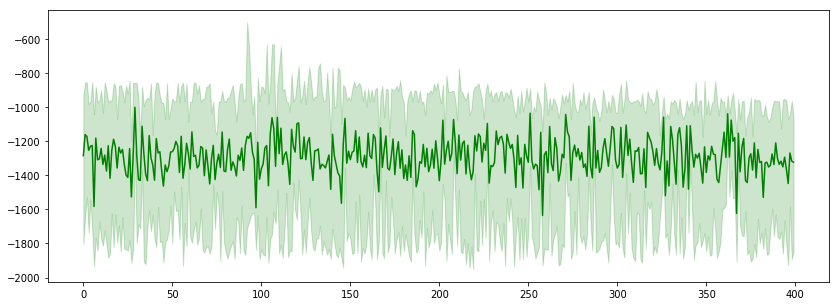

In [5]:
plotting_pendulum(env, agent, learn_pendulum_policy, 400)

In [6]:
from Pendulum_VanillaPolicyGradient_withNormalization import PendulumVanillaAgent_withNorm
policy = PendulumPolicy(input_dim, output_dim)
agent = PendulumVanillaAgent_withNorm(policy, env.action_space.low, env.action_space.high)

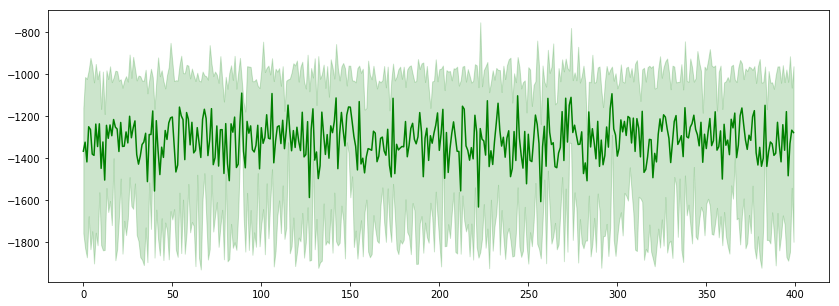

In [7]:
plotting_pendulum(env, agent, learn_pendulum_policy, 400)

In [8]:
from Pendulum_Baseline_withNormalization import PendulumBaselineAgent
policy = PendulumPolicy(input_dim, output_dim)
agent = PendulumBaselineAgent(policy, env.action_space.low, env.action_space.high)

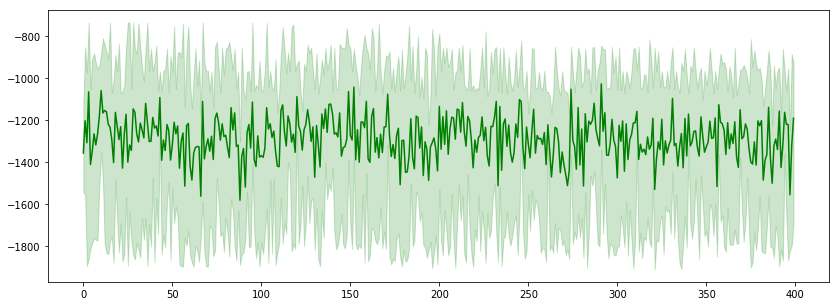

In [9]:
plotting_pendulum(env, agent, learn_pendulum_policy, 400)

In [10]:
from Pendulum_ActorCriticAgent import PendulumActorCriticAgent
from Pendulum_ACPolicy import PendulumACPolicy
policy = PendulumACPolicy(input_dim, output_dim)
agent = PendulumActorCriticAgent(policy, env.action_space.low, env.action_space.high)

/home/aishwarya/CourseWork/Sem5/TopicsInML/assignment3/20171046_assign3/Pendulum_ActorCriticAgent.py:42: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  value_loss.append(F.smooth_l1_loss(value, torch.tensor([R])))


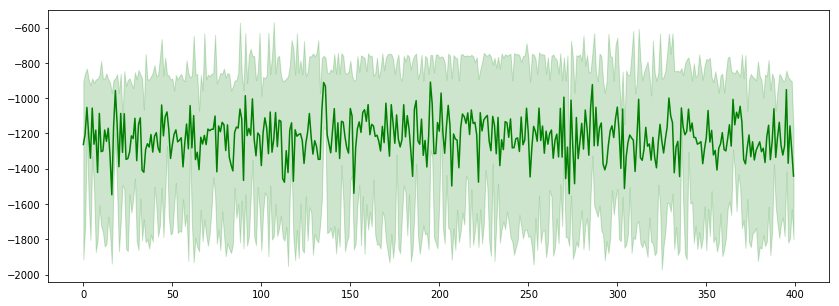

In [11]:
plotting_pendulum(env, agent, learn_pendulum_policy, 400)

In [12]:
from GaussianAgent import GaussianAgent
from GaussianPolicy import GaussianPolicy
policy = GaussianPolicy(input_dim, output_dim)
agent = GaussianAgent(policy, env.action_space.low, env.action_space.high)

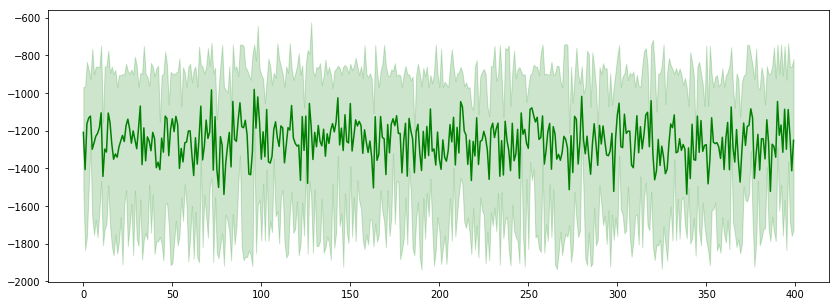

In [13]:
plotting_pendulum(env, agent, learn_pendulum_policy, 400)